# Центральная предельная теорема своими руками

### Задание:

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Гистограмма выборки

Рассмотрим двусторонне-экспоненциальное распределение случайной величины с $\alpha = 1, \beta = 0$. 

Плотность вероятности будет иметь следующий вид:

$
f(x) = \frac{\alpha}{2} \,e^{-\alpha |x - \beta|} , x \in R, \\
$

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [1]:
# import all necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# generating a sample of 1000 from the distribution
rv = sts.laplace() 
sample = rv.rvs(1000)

# calculate the theoretical probability density for the distribution
x = np.linspace(-10,10,1000)
pdf = rv.pdf(x)

Text(0, 0.5, '$f(x)$')

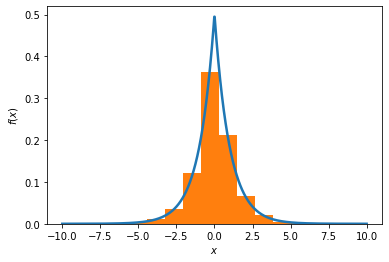

In [2]:
# we build a histogram of the sample and impose on it a theoretical estimate of the probability 
# density of the exponential distribution

plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, density = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Вывод: по графику можно оценить что гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

## Распределение выборочных средних

Оценим распределение выборочных средних случайной величины. Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В нашем случае двустороннего-экспоненциального распределения: $\mathbb{E}X = \beta \, = 0$ - математическое ожидание, $\mathbb{D}X = \frac{2}{\alpha^2}, = 2$ - дисперсия.

Таким образом, распределение выборочных средних экспоненциального распределения с $\alpha = 1, \beta = 0$ будет приближаться нормальным распределением $N(\mu = 0, \sigma^2 = \frac{2}{n})$.

In [3]:
# we describe a function that, for a sample size n,
# generates a graph of the histogram of the sample means of a random variable 
# and a theoretical estimate of the probability density for the distribution of sample means


def generate_pdf(n): 
    # generate sample averages for samples of size n
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # calculate the theoretical probability density for the normal distribution
    mu = 0 # theoretical expectation
    sigma = (2./n) ** 0.5 # standard deviation
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(-4,4,100)
    pdf = norm_rv.pdf(x)
    
    # build a histogram of sample averages and superimpose theoretical estimate
    # of the probability density of the normal distribution
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, density = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

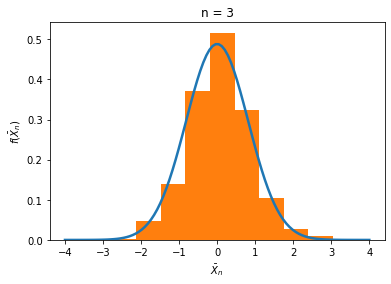

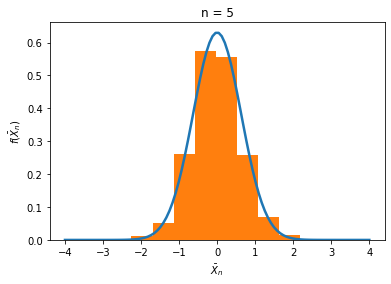

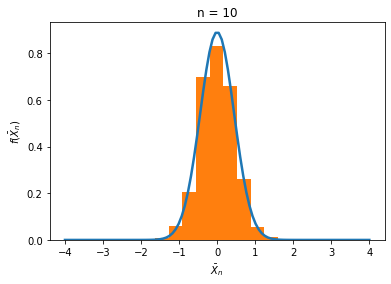

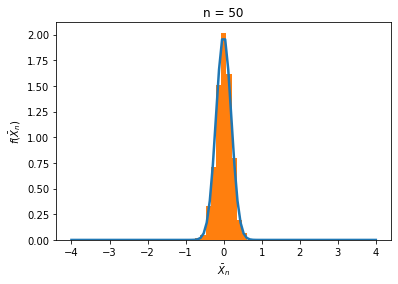

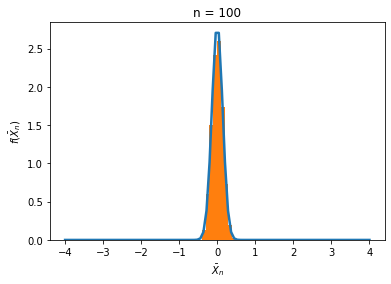

In [4]:
# plotting histograms of distributions of sample means and approximating normal distributions
# for different sample sizes n


for n in [3, 5, 10, 50, 100]:
    generate_pdf(n)

Вывод: по приведенным выше графикам можно сказать что при увеличении объема выборки n распределение выборочных средних все больше соответствует приближающему его нормальному распределению. Так же с ростом n уменьшается дисперсия распределения выборочных средних.